# Parameter sensitivity analysis

In [1]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("./pig/")

from pig.config import config as pig_cfg
from pig.generator import Generator
from pig.plot import plot_field

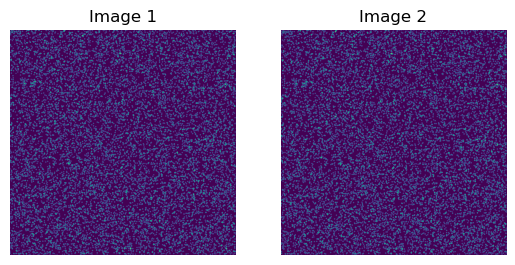

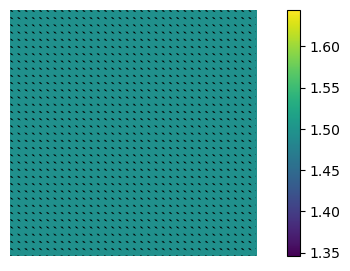

In [2]:
cfg = pig_cfg()
cfg.flow = "uniform_flow" 
# cfg.uniform_flow = {'c_x':4.32, 'c_y':1.23} # uniform_flow
cfg.uniform_flow = {'c_x':0.85, 'c_y':1.23} # uniform_flow

pig = Generator(cfg)
img1, img2, ut, vt = pig.compute()

plt.figure()
plt.subplot(1,2,1); plt.imshow(img1); plt.title("Image 1"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(img2); plt.title("Image 2"); plt.axis("off")

amp = np.sqrt(ut**2+vt**2)
x, y = np.meshgrid(np.arange(ut.shape[0]), np.arange(ut.shape[1]), indexing="ij")
fig = plot_field(x,y,ut,vt,bkg=amp,cmap=None,figsize=(8,3.2))

In [3]:
from utils.metrics import  PIVmetric
from piv_onepass import piv_scc, piv_scc_min, piv_rpc, piv_sbcc

ut, vt = np.mean(ut), np.mean(vt)

print("SCC:")
x1,y1,u1,v1 = piv_scc(img1, img2)
res_scc = PIVmetric(ut+0*u1,vt+0*v1,u1,v1)

print("SCC-MIN:")
x1,y1,u1,v1 = piv_scc_min(img1, img2)
res_scc_min = PIVmetric(ut+0*u1,vt+0*v1,u1,v1)

print("RPC:")
x1,y1,u1,v1 = piv_rpc(img1, img2)
res_rpc = PIVmetric(ut+0*u1,vt+0*v1,u1,v1)

print("SBCC...")
mus = np.linspace(0,16,161)
results = []
for mu in mus:
    x1,y1,u1,v1 = piv_sbcc(img1, img2, mu=mu)
    res = PIVmetric(ut+0*u1,vt+0*v1,u1,v1, show=False)
    results.append(res)

SCC:
0.1219(RMSE)	0.1020(AEE)	0.0462(AAE,rad)	0.0422(SSIM)	0.9875(MoC)	0(Outlier)	
SCC-MIN:
0.9463(RMSE)	0.9322(AEE)	0.1269(AAE,rad)	0.0131(SSIM)	1.5816(MoC)	0(Outlier)	
RPC:
0.0957(RMSE)	0.0830(AEE)	0.0337(AAE,rad)	0.0488(SSIM)	0.9772(MoC)	0(Outlier)	
SBCC...


/tmp/ipykernel_141550/287801002.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


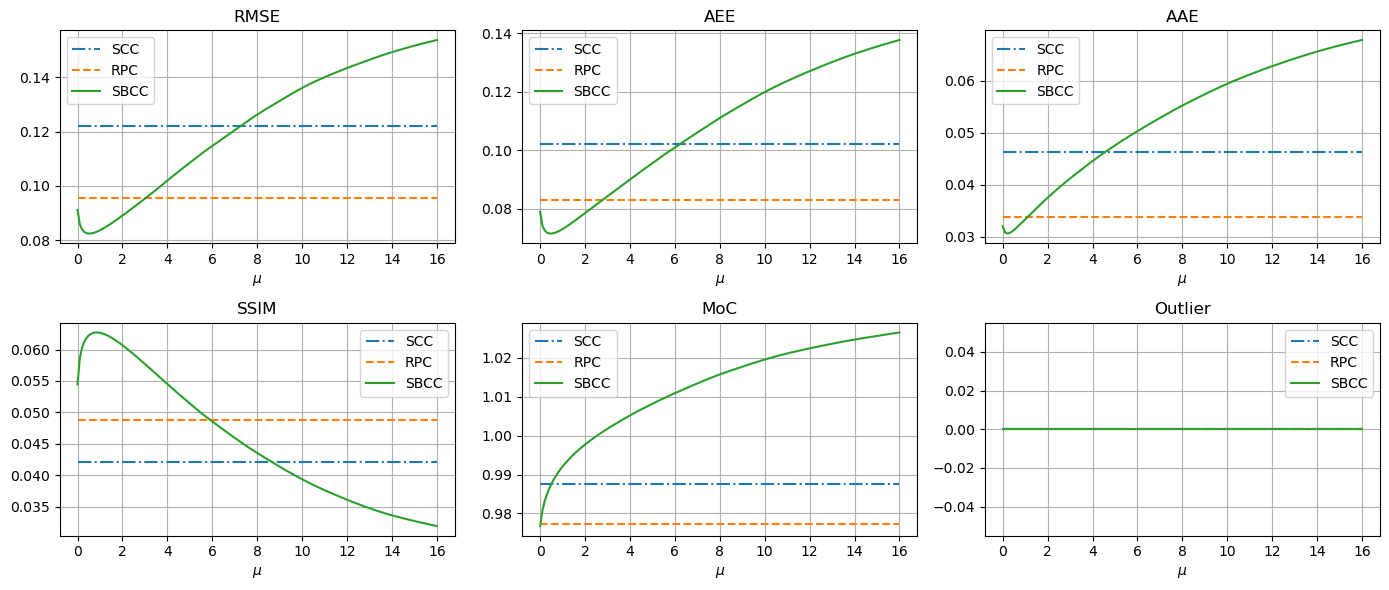

In [4]:
results = np.array(results)
names = ["RMSE", "AEE", "AAE", "SSIM", "MoC", "Outlier"]
plt.figure(figsize=(14,6))
for k, name in enumerate(names):
    plt.subplot(2,3, k+1)
    # plt.plot(mus, res_scc_min[k]+0*mus, ':', label="SCC-MIN")
    plt.plot(mus, res_scc[k]+0*mus, '-.', label="SCC")
    plt.plot(mus, res_rpc[k]+0*mus, '--', label="RPC")
    plt.plot(mus, results[:,k], '-', label="SBCC")
    plt.xlabel("$\mu$")
    plt.grid("on")
    # plt.yscale('log')
    plt.legend()
    plt.tight_layout()
    plt.title(name)
plt.show()

(-0.5, 511.5, 511.5, -0.5)

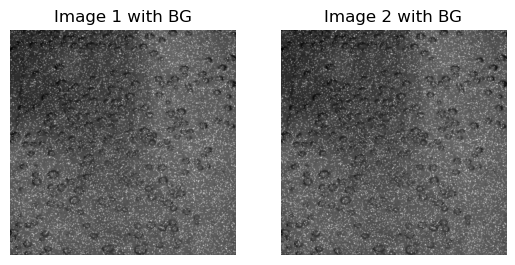

In [5]:
bg = cv2.imread("./data/simulated/bubbles/Class_1/13790.jpg", 0)
bg = cv2.resize(bg, img1.shape)
img1_ = 0.0+img1+bg
img2_ = 0.0+img2+bg

plt.figure()
plt.subplot(1,2,1); plt.imshow(img1_, cmap="gray"); plt.title("Image 1 with BG"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(img2_, cmap="gray"); plt.title("Image 2 with BG"); plt.axis("off")

In [6]:
print("SCC:")
x1,y1,u1,v1 = piv_scc(img1_, img2_)
res_scc = PIVmetric(ut+0*u1,vt+0*v1,u1,v1)

print("SCC-MIN:")
x1,y1,u1,v1 = piv_scc_min(img1, img2)
res_scc_min = PIVmetric(ut+0*u1,vt+0*v1,u1,v1)

print("RPC:")
x1,y1,u1,v1 = piv_rpc(img1_, img2_)
res_rpc = PIVmetric(ut+0*u1,vt+0*v1,u1,v1)

print("SBCC...")
results = []
for mu in mus:
    x1,y1,u1,v1 = piv_sbcc(img1_, img2_, mu=mu)
    res = PIVmetric(ut+0*u1,vt+0*v1,u1,v1, show=False)
    results.append(res)

results = np.array(results)

SCC:
0.1741(RMSE)	0.1590(AEE)	0.0372(AAE,rad)	0.0545(SSIM)	0.9096(MoC)	0(Outlier)	
SCC-MIN:
0.9463(RMSE)	0.9322(AEE)	0.1269(AAE,rad)	0.0131(SSIM)	1.5816(MoC)	0(Outlier)	
RPC:
0.2094(RMSE)	0.1853(AEE)	0.0428(AAE,rad)	0.0276(SSIM)	0.8909(MoC)	0(Outlier)	
SBCC...


/tmp/ipykernel_141550/3081502337.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


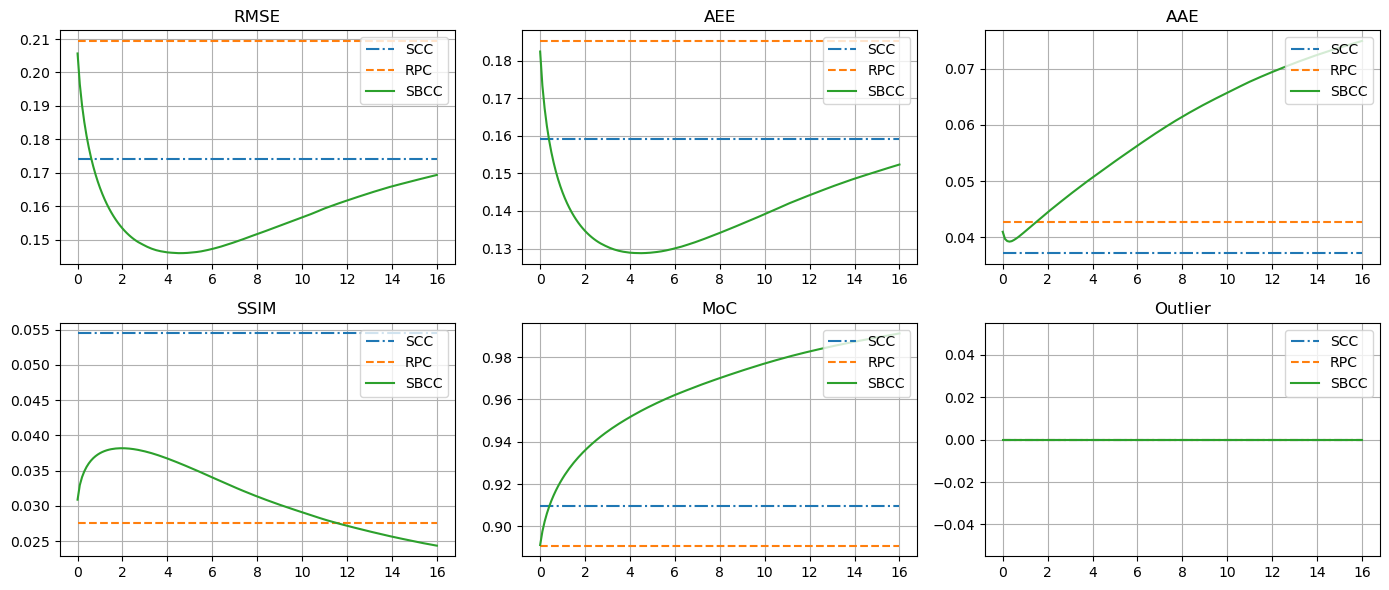

In [7]:
names = ["RMSE", "AEE", "AAE", "SSIM", "MoC", "Outlier"]
plt.figure(figsize=(14,6))
for k, name in enumerate(names):
    plt.subplot(2,3, k+1)
    # plt.plot(mus, res_scc_min[k]+0*mus, ':', label="SCC-MIN")
    plt.plot(mus, res_scc[k]+0*mus, '-.', label="SCC")
    plt.plot(mus, res_rpc[k]+0*mus, '--', label="RPC")
    plt.plot(mus, results[:,k], '-', label="SBCC")
    # plt.yscale('log')
    plt.legend(loc=1)
    plt.grid("on")
    plt.tight_layout()
    plt.title(name)
plt.show()